In [2]:
import pandas as pd
import seaborn as sns

file_name = 'creditcard.csv'
data = pd.read_csv(file_name)

print(data.describe())
print(data.shape)
print(data.info())

y = data['Class']
X = data.drop(columns=['Class'])

print(f'Shape of X:', str({X.shape}), 'Shape of y:', str({y.shape}))


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

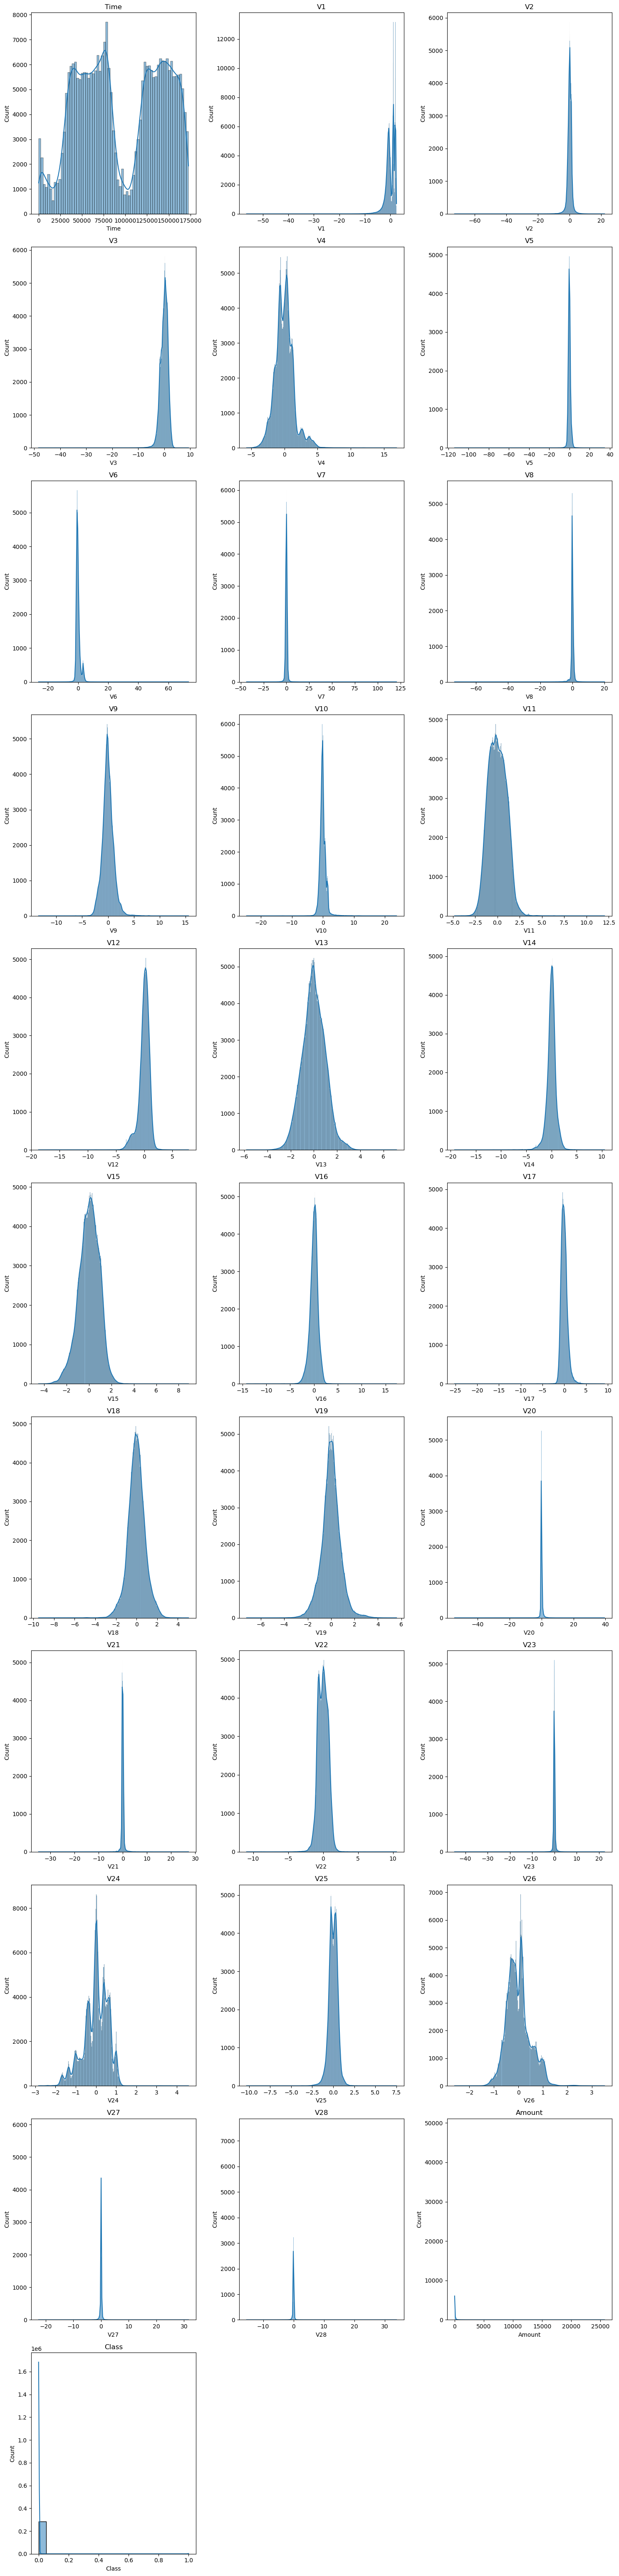

In [3]:
import matplotlib.pyplot as plt

# Number of features
num_features = data.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_features//3 + 1, ncols=3, figsize=(15, num_features*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(data.columns):
    sns.histplot(data[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

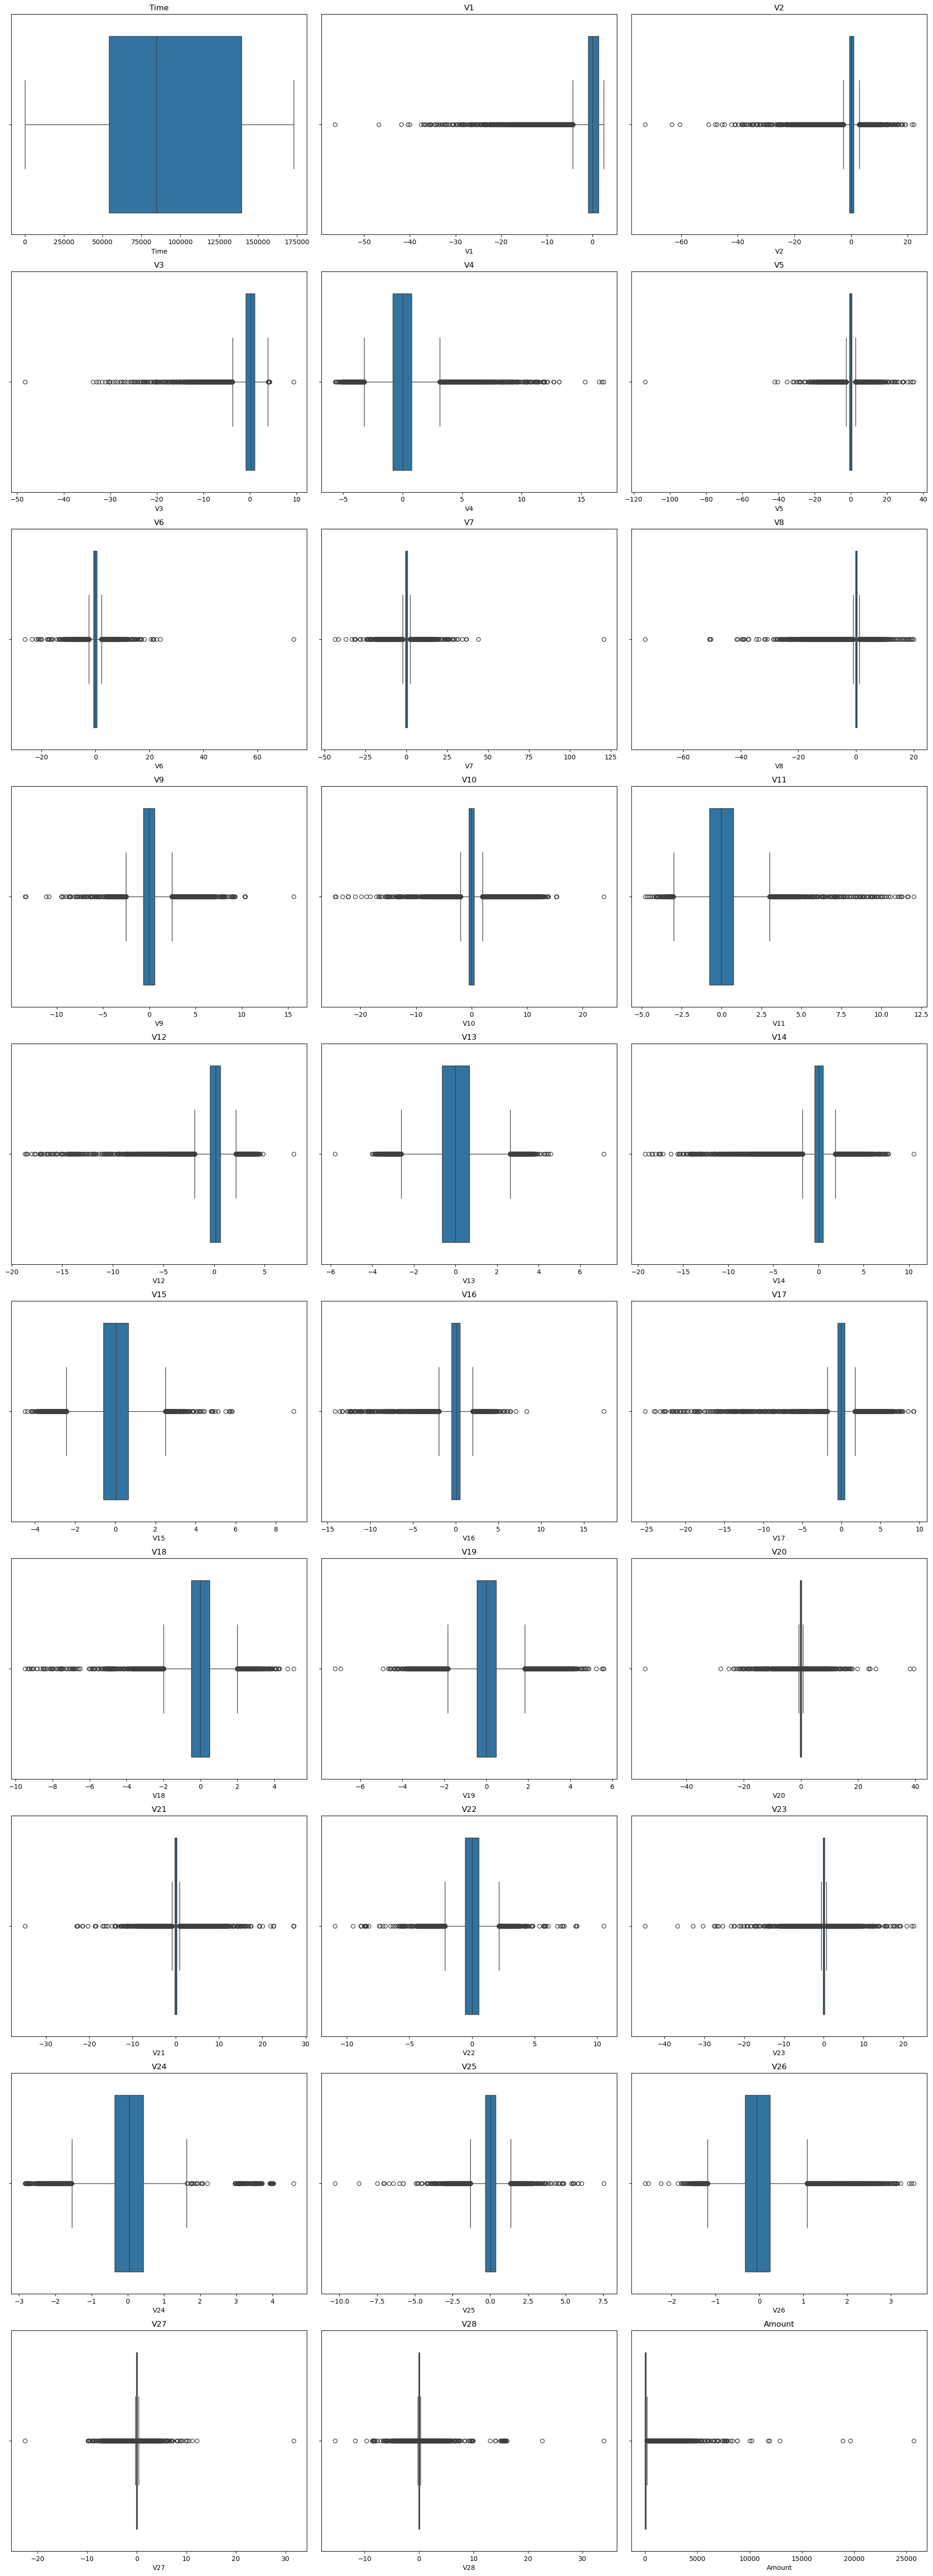

In [4]:
# Number of features
num_features = X.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_features//3 + 1, ncols=3, figsize=(20, num_features*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each feature
for i, col in enumerate(X.columns):
    sns.boxplot(x=X[col], ax=axes[i])
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# there are outliers but keèt them because they might be related to fraud

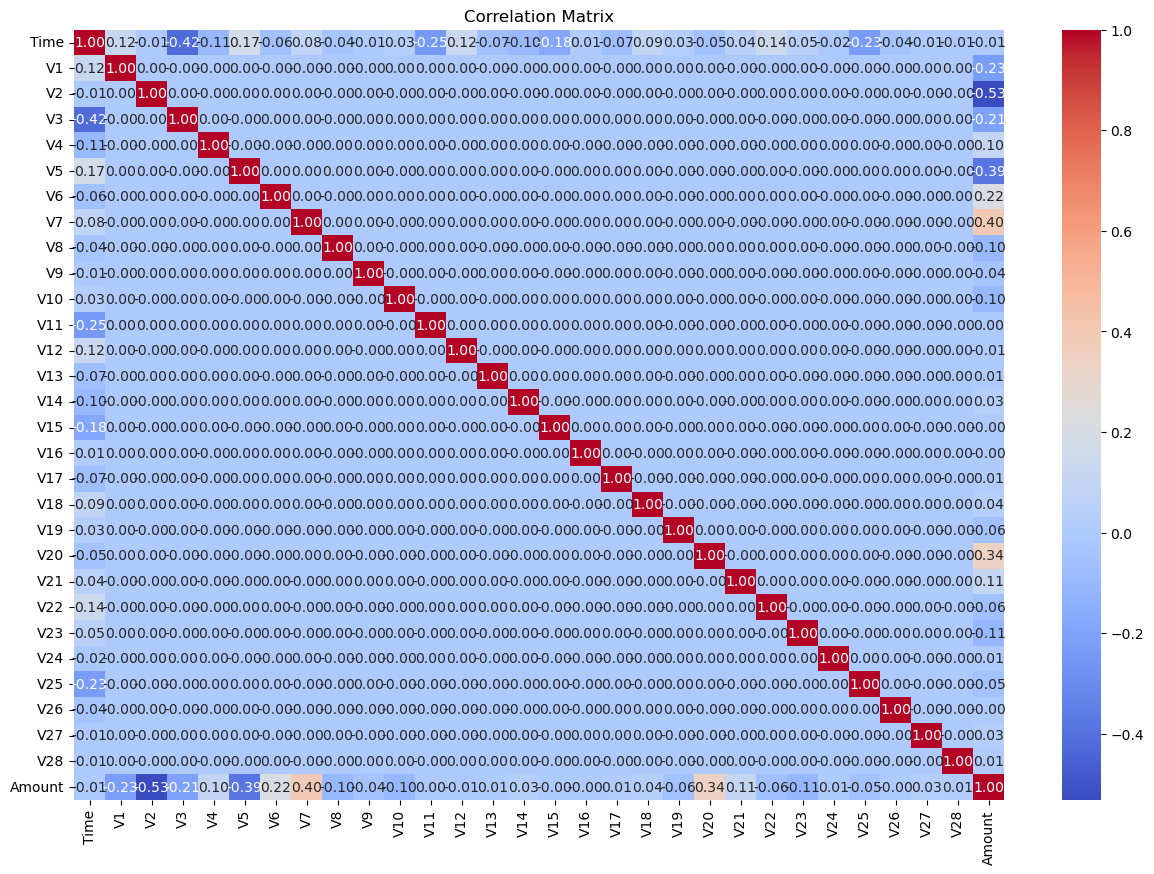

In [5]:
correlation_matrix = X.corr()
# print(correlation_matrix)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# there doesnt seem to be any important correlation, so kept every feature

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=5)  # You can change the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance}')
print(f'Total explained variance {np.sum(explained_variance)}')

Explained variance ratio: [0.06527521 0.05612313 0.03333333 0.03333333 0.03333333]
Total explained variance 0.22139834577465567


In [ ]:

class_counts = y.value_counts()
print(class_counts) # the dataset is very imbalance, a rebalancment is needed to not bias the models

from imblearn.over_sampling import SMOTE
#  (Synthetic Minority Over-sampling Technique) is a technique used to handle imbalanced datasets in machine learning, 
# where the classes are unevenly distributed. In cases where there is a minority class (credit fraud in this case), 
# SMOTE helps balance the dataset by generating synthetic examples for the minority class instead of just oversampling the existing minority class instances.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print(X_resampled.shape, X_train.shape)
class_counts = y_resampled.value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64
(398016, 30) (199364, 30)
Class
0    199008
1    199008
Name: count, dtype: int64


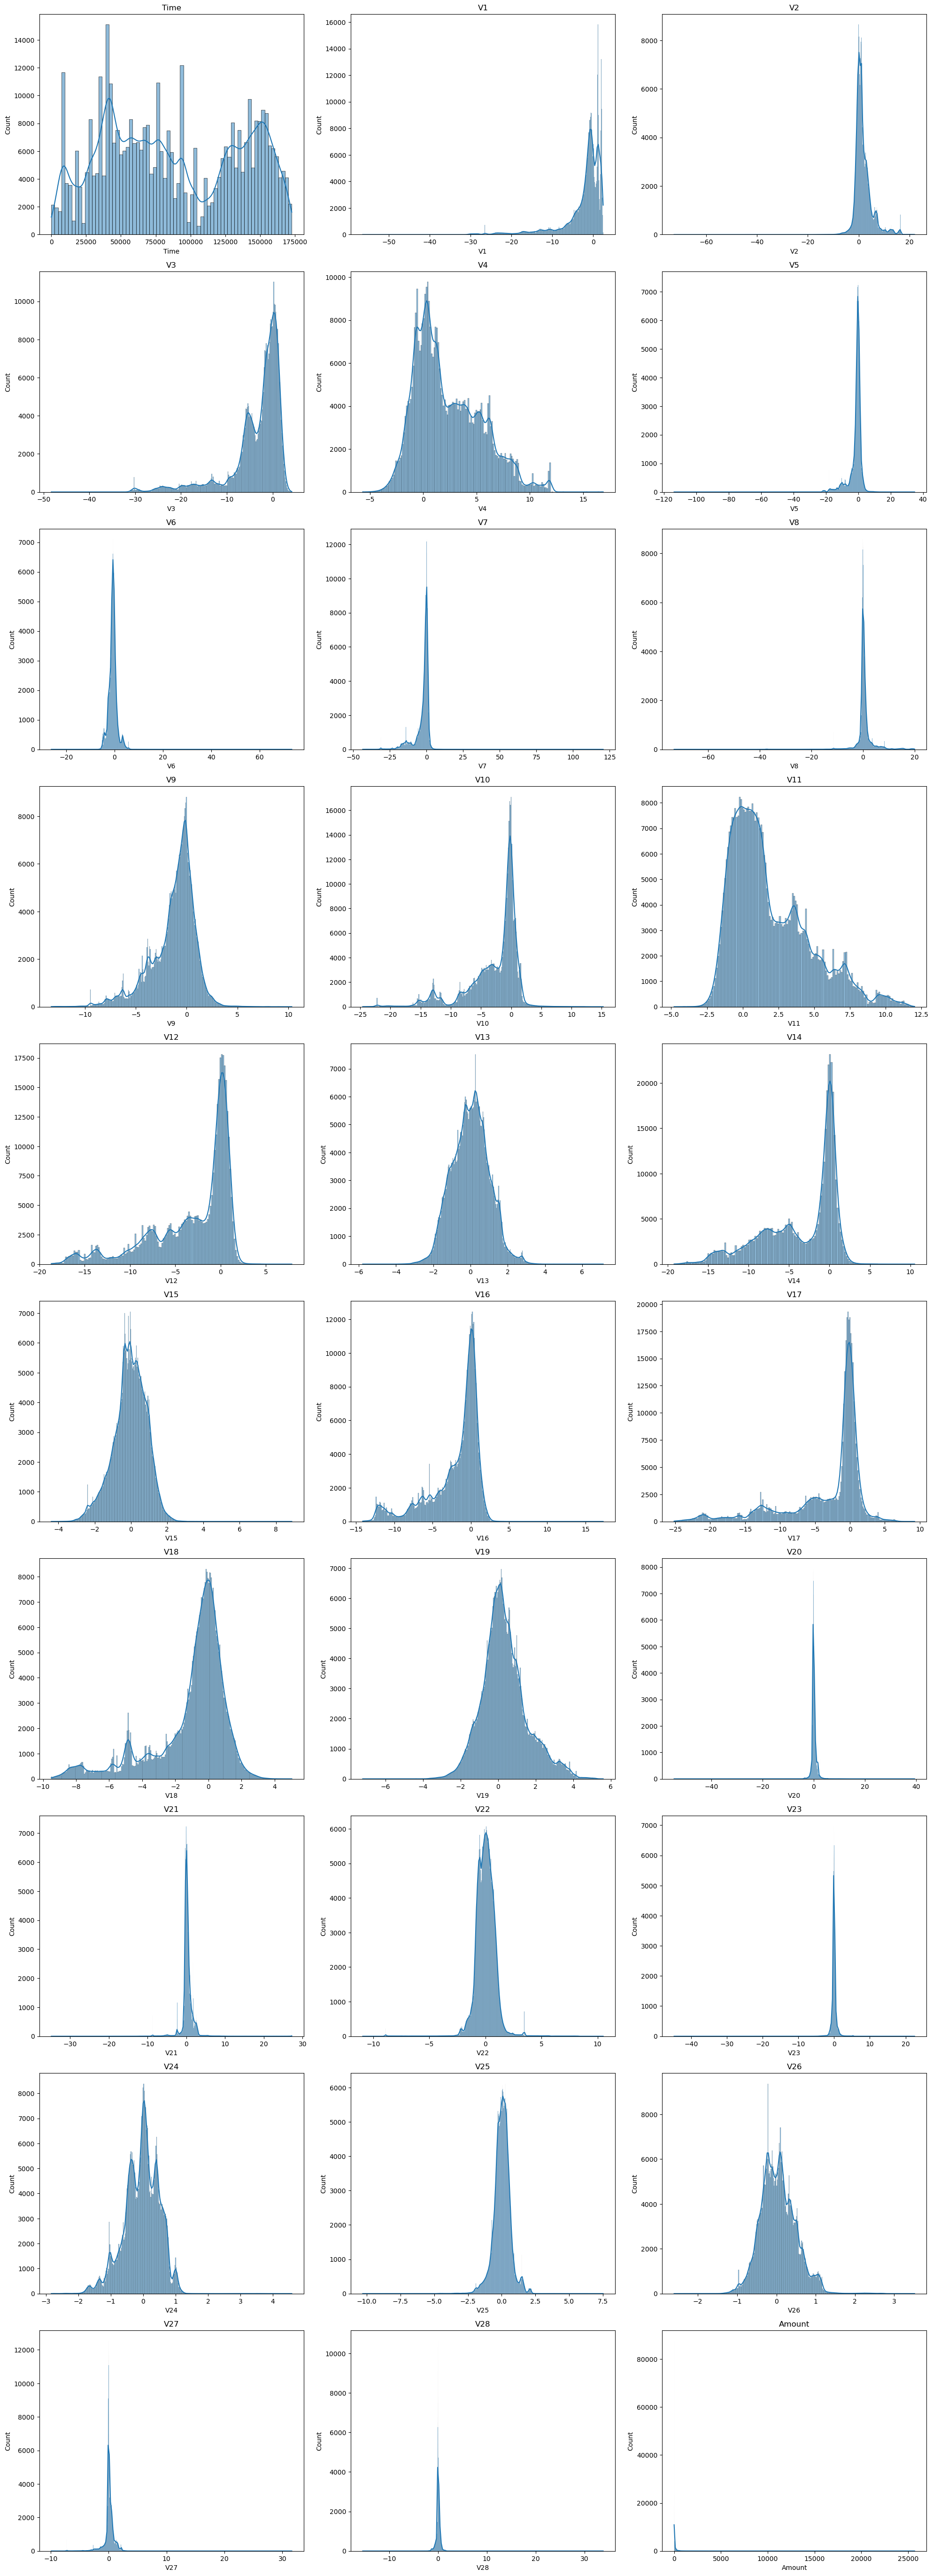

In [8]:
# Number of features
num_features = X_resampled.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=num_features//3 + 1, ncols=3, figsize=(20, num_features*2))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, col in enumerate(X_resampled.columns):
    sns.histplot(X_resampled[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Accuracy: 0.9995201479348805
Recall: 0.875
Precision: 0.8321678321678322
Confusion Matrix:
[[85283    24]
 [   17   119]]
AUPRC: 0.8536833976096115


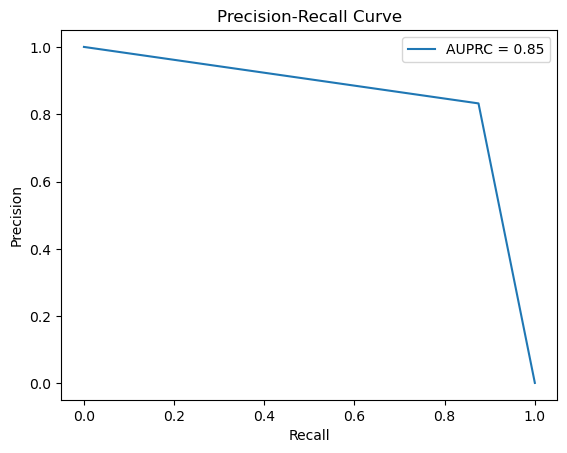

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

# Train the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print(f'Recall: {recall_rf}')
print(f'Precision: {precision_rf}')

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix_rf)

# Precision-Recall curve and AUPRC
precision_vals_rf, recall_vals_rf, _ = precision_recall_curve(y_test, y_pred_rf)
auprc_rf = auc(recall_vals_rf, precision_vals_rf)

print(f'AUPRC: {auprc_rf}')

plt.figure()
plt.plot(recall_vals_rf, precision_vals_rf, label=f'AUPRC = {auprc_rf:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

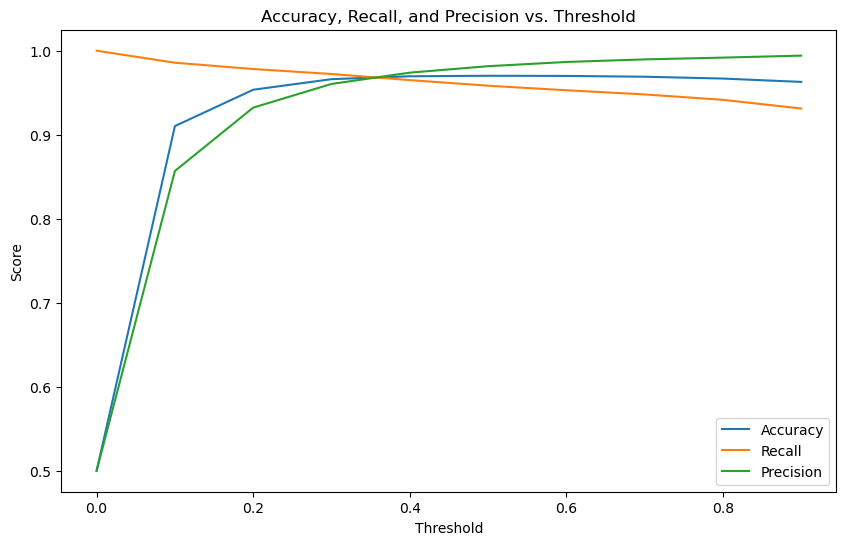

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold
import numpy as np

model_lg = LogisticRegression()
model_lg.fit(X_resampled, y_resampled)

# Cross-validation to find the best threshold
skf = StratifiedKFold(n_splits=5)
thresholds = np.arange(0.0, 1.0, 0.1)
best_threshold = 0
best_recall = 0


accuracy = []
recall = []
precision = []
for threshold in thresholds:
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    for train_index, val_index in skf.split(X_resampled, y_resampled):
        X_train_cv, X_val_cv = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
        y_train_cv, y_val_cv = y_resampled.iloc[train_index], y_resampled.iloc[val_index]

        model_lg.fit(X_train_cv, y_train_cv)
        y_val_pred_prob = model_lg.predict_proba(X_val_cv)[:, 1]

        y_val_pred = (y_val_pred_prob >= threshold).astype(int)

        accuracy_scores.append(accuracy_score(y_val_cv, y_val_pred))
        recall_scores.append(recall_score(y_val_cv, y_val_pred))
        precision_scores.append(precision_score(y_val_cv, y_val_pred))
    accuracy.append(np.mean(accuracy_scores))
    recall.append(np.mean(recall_scores))
    precision.append(np.mean(precision_scores))


plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, recall, label='Recall')
plt.plot(thresholds, precision, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Accuracy, Recall, and Precision vs. Threshold')
plt.legend()
plt.show()


/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/var/folders/q1/rqglfbqj20db36k7w1n5qxbc0000gn/T/ipykernel_6079/1180370210.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Feature', data=feature_importance_df, palette='viridis')


Accuracy: 0.9636950949755978
Recall: 0.9264705882352942
Precision: 0.03915475450590429
Confusion Matrix:
[[82215  3092]
 [   10   126]]


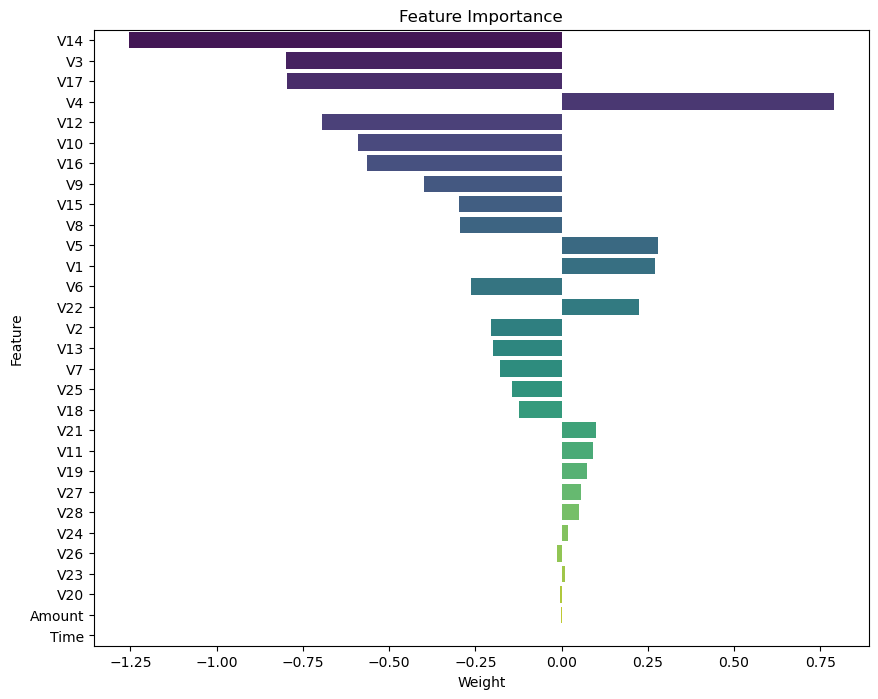

In [11]:
model_lg = LogisticRegression()
model_lg.fit(X_resampled, y_resampled)
threshold = 0.3

y_pred_prob = model_lg.predict_proba(X_test)[:, 1]

y_pred_lg = (y_pred_prob >= threshold).astype(int)

accuracy_lg = accuracy_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)

print(f'Accuracy: {accuracy_lg}')
print(f'Recall: {recall_lg}')
print(f'Precision: {precision_lg}')

# Confusion matrix
conf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
print('Confusion Matrix:')
print(conf_matrix_lg)

# Get the feature weights
feature_weights = model_lg.coef_[0]

# Create a DataFrame to display the feature names and their corresponding weights
feature_importance_df = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Weight': feature_weights
})

# Sort the DataFrame by the absolute value of the weights
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Weight.abs().sort_values(ascending=False).index)

# Plot the absolute value of feature weights
plt.figure(figsize=(10, 8))
sns.barplot(x='Weight', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()

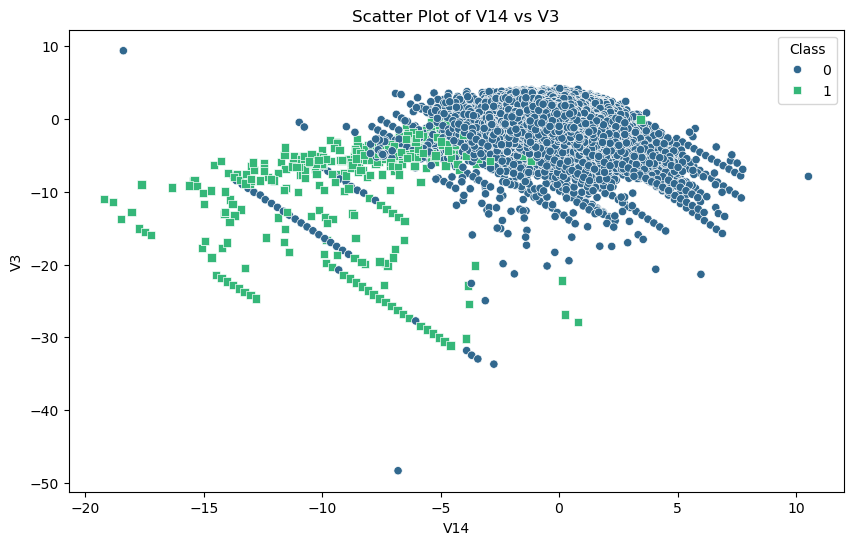

In [12]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(data=data, x='V14', y='V3', hue='Class', style='Class', palette='viridis', markers=['o', 's'])

plt.title('Scatter Plot of V14 vs V3')
plt.xlabel('V14')
plt.ylabel('V3')
plt.legend(title='Class')
plt.show()

In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, auc

# Train the AdaBoost model
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_ab = model_ab.predict(X_test)

# Calculate metrics
accuracy_ab = accuracy_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)

print(f'Accuracy: {accuracy_ab}')
print(f'Recall: {recall_ab}')
print(f'Precision: {precision_ab}')

# Confusion matrix
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
print('Confusion Matrix:')
print(conf_matrix_ab)


/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9856980677176598
Recall: 0.9191176470588235
Precision: 0.09356287425149701
Confusion Matrix:
[[84096  1211]
 [   11   125]]


/opt/anaconda3/envs/env_ml_sp/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9993211848834895
Recall: 0.7352941176470589
Precision: 0.819672131147541
Confusion Matrix:
[[85285    22]
 [   36   100]]
AUROC: 0.8675181127815867


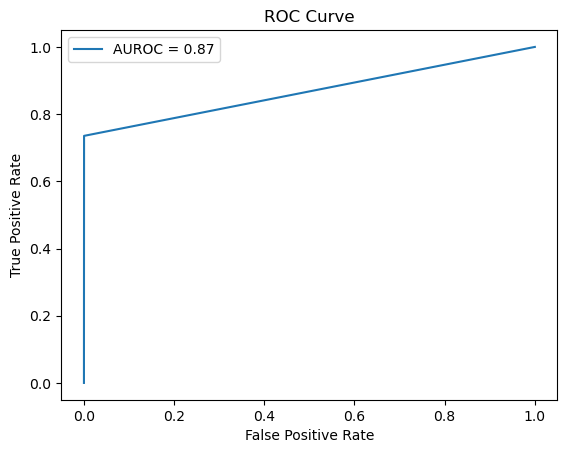

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

# Train the AdaBoost model
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X_train, y_train)

# Predict on the test set
y_pred_ab = model_ab.predict(X_test)

# Calculate metrics
accuracy_ab = accuracy_score(y_test, y_pred_ab)
recall_ab = recall_score(y_test, y_pred_ab)
precision_ab = precision_score(y_test, y_pred_ab)

print(f'Accuracy: {accuracy_ab}')
print(f'Recall: {recall_ab}')
print(f'Precision: {precision_ab}')

# Confusion matrix
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
print('Confusion Matrix:')
print(conf_matrix_ab)

# Calculate ROC curve and AUC
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_pred_ab)
auroc_ab = roc_auc_score(y_test, y_pred_ab)

print(f'AUROC: {auroc_ab}')

# Plot ROC curve
plt.figure()
plt.plot(fpr_ab, tpr_ab, label=f'AUROC = {auroc_ab:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

